# **Goal:** find the number of wins per team in the regular season

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
from matplotlib.ticker import MaxNLocator
from matplotlib.lines import Line2D

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import nfl_data_py as nfl
#from pro_football_reference_web_scraper import team_game_log as t
import urllib.request
import os
import time
#from google.colab import drive
#drive.mount('/content/drive')


## Downloading the data
api: https://pypi.org/project/pro-football-reference-web-scraper/

In [1]:
!pip install pro-football-reference-web-scraper

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 62 kB 2.9 MB/s  eta 0:00:01
  Created wheel for pro-football-reference-web-scraper: filename=pro_football_reference_web_scraper-0.2.1-py3-none-any.whl size=19389 sha256=4e5d5b38d4ebeebc556db4a4534cd6bf3c018d405dada2c96d90fc7fa6685324
  Stored in directory: /Users/jarrettsung/Library/Caches/pip/wheels/97/89/05/e48704065cbb182711a1b669bf96dfa81f45dd790f0feb1a9c
Successfully built pro-football-reference-web-scraper
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 

Pandas html scraper: https://stmorse.github.io/journal/pfr-scrape-python.html

In [2]:
url = 'https://www.pro-football-reference.com/players/W/WilsRu00/fantasy/2018/'
df = pd.read_html(url)[0]
df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
  Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1 Unnamed: 3_level_1   
                  Rk                 G#               Date                 Tm   
0                1.0                1.0         2018-09-09                SEA   
1                2.0                2.0         2018-09-17                SEA   
2                3.0                3.0         2018-09-23                SEA   
3                4.0                4.0         2018-09-30                SEA   
4                5.0                5.0         2018-10-07                SEA   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Unnamed: 7_level_0  \
  Unnamed: 4_level_1 Unnamed: 5_level_1 Unnamed: 6_level_1 Unnamed: 7_level_1   
  Unnamed: 4_level_2                Opp             Result                Pos   
0                  @                DEN            L 24-27                 QB   
1                  @                CHI            L 17-24                 QB   
2                NaN                DAL            W 24-13                 QB   
3                  @                ARI            W 20-17                 QB   
4                NaN                LAR            L 31-33                 QB   

  Inside 20      ... Inside 10 Snap Counts                               \
    Passing      ...   Rushing        Off.         Def.        ST         
        Cmp Att  ...        TD         Num     Pct  Num   Pct Num   Pct   
0         1   3  ...         0          57  100.0%    0  0.0%   0  0.0%   
1         3   4  ...         0          66  100.0%    0  0.0%   0  0.0%   
2         2   2  ...         0          69  100.0%    0  0.0%   0  0.0%   
3         0   1  ...         0          66  100.0%    0  0.0%   0  0.0%   
4         2   2  ...         0          60  100.0%    0  0.0%   0  0.0%   

  Unnamed: 28_level_0 Unnamed: 29_level_0 Unnamed: 30_level_0  
              Fantasy             Fantasy             Fantasy  
               FantPt                DKPt                FDPt  
0               20.42                22.4                22.4  
1               14.74                16.7                15.7  
2               15.58                15.6                15.6  
3                8.98                 9.0                 9.0  
4               19.92                19.9                19.9  

[5 rows x 31 columns]

In [4]:
teams = [
    'Arizona Cardinals',
    'Atlanta Falcons',
    'Baltimore Ravens',
    'Buffalo Bills',
    'Carolina Panthers',
    'Chicago Bears',
    'Cincinnati Bengals',
    'Cleveland Browns',
    'Dallas Cowboys',
    'Denver Broncos',
    'Detroit Lions',
    'Green Bay Packers',
    'Houston Texans',
    'Indianapolis Colts',
    'Jacksonville Jaguars',
    'Kansas City Chiefs',
    'Las Vegas Raiders',
    'Los Angeles Chargers',
    'Los Angeles Rams',
    'Miami Dolphins',
    'Minnesota Vikings',
    'New England Patriots',
    'New Orleans Saints',
    'New York Giants',
    'New York Jets',
    'Philadelphia Eagles',
    'Pittsburgh Steelers',
    'San Francisco 49ers',
    'Seattle Seahawks',
    'Tampa Bay Buccaneers',
    'Tennessee Titans',
    'Washington Commanders'
]

train_years = [2015, 2016, 2017, 2018, 2019, 2020]
test_years = [2021, 2022]

In [5]:


def fetch_team_game_logs(teams, train_years):
    # Initialize an empty DataFrame to store the combined data
    combined_df = pd.DataFrame()

    # Iterate through each team and training year
    for team in teams:
        for year in train_years:
            time.sleep(4)
            print(team, year)
            # Fetch the game log for the current team and year
            game_log = t.get_team_game_log(team=team, season=year)

            team_df = pd.DataFrame(game_log)

            # Add columns for team and year
            team_df['team'] = team
            team_df['year'] = year

            # Append the team's game log to the combined DataFrame
            combined_df = combined_df.append(team_df, ignore_index=True)

    return combined_df

SystemError: initialization of _internal failed without raising an exception

## Training with SOS

In [3]:
# Get the train data file path
filepath_train = '/Users/jarrettsung/Documents/GitHub/NFL-Win-Prediction-Project/CSVs/new_train_data_with_avgs.csv'

#Get the test data file path
filepath_test = '/Users/jarrettsung/Documents/GitHub/NFL-Win-Prediction-Project/CSVs/new_test_data_with_avgs.csv'

# Read in the train data and format
X_train = pd.read_csv(filepath_train)
y_train = X_train["Win_Percentage"]
X_train = X_train.drop(['Team', 'Year', 'Win_Percentage', 'Total_Rest_Days', 'Playoff'], axis = 1)

# Read in the test data and format
X_test = pd.read_csv(filepath_test)
y_test = X_test["Win_Percentage"]
X_test = X_test.drop(['Team', 'Year', 'Win_Percentage', 'Total_Rest_Days', 'Playoff'], axis = 1)
X_test.head()

,Total_Distance_Traveled,Total_Points_For,Total_Points_Allowed,Total_Yards,Rush_Yards,Pass_Yards,Total_Opp_Yards,Opp_Rush_Yards,Opp_Pass_Yards,PF_Per_Game,...,Rush_Yds_Per_Game,Pass_YDs_Per_game,Opp_Yds_Per_Game,Opp_Rush_Yds_Per_game,Opp_Pass_Yds_Per_game,PD,Yds_DIff,PD_Per_Game,Yds_Diff_Per_Game,SOS
0,11029.604150,449,366,6352,2076,4276,5597,1952,3645,26.411765,...,122.117647,251.529412,329.235294,114.823529,214.411765,83,755,4.882353,44.411765,0.31
1,7582.250614,340,449,5499,1873,3626,5931,2016,3915,20.000000,...,110.176471,213.294118,348.882353,118.588235,230.294118,-109,-432,-6.411765,-25.411765,0.21
2,6208.864683,313,459,5164,1451,3713,6194,2242,3952,18.411765,...,85.352941,218.411765,364.352941,131.882353,232.470588,-146,-1030,-8.588235,-60.588235,0.10
3,6662.598089,365,386,5417,2718,2699,6156,2214,3942,21.470588,...,159.882353,158.764706,362.117647,130.235294,231.882353,-21,-739,-1.235294,-43.470588,-0.88
4,6496.672853,387,392,6440,2479,3961,6178,1436,4742,22.764706,...,145.823529,233.000000,363.411765,84.470588,278.941176,-5,262,-0.294118,15.411765,0.01


In [4]:
# Making sure all columns match up for test & train data
common_columns = set(X_test.columns) & set(X_train.columns) #Columns in common
unique_to_test = set(X_test.columns) - set(X_train.columns) #Column names only in the test set
unique_to_train = set(X_train.columns) - set(X_test.columns) #Column names only in the train set

print(common_columns)
print("Only in test")
print(unique_to_test) 
print("\nOnly in train")
print(unique_to_train)

# test_data = test_data.rename(columns={'Avg_Pass_Yards': 'Pass_YDs_Per_game', 'Avg_Opp_Yards': 'Opp_Yds_Per_Game',
#                                       'Avg_Points_Allowed': 'PA_Per_Game', 'Avg_Rush_Yards': 'Rush_Yds_Per_Game',
#                                       'Avg_Opp_Pass_Yards': 'Opp_Pass_Yds_Per_game', 'Avg_Points_For': 'PF_Per_Game',
#                                       'Avg_Yards': 'Yds_Per_game', 'Avg_Opp_Rush_Yards': 'Opp_Rush_Yds_Per_game'})


{'Pass_YDs_Per_game', 'Rush_Yards', 'Total_Points_For', 'Opp_Rush_Yds_Per_game', 'Total_Distance_Traveled', 'Yds_Per_game', 'Yds_Diff_Per_Game', 'SOS', 'PD', 'Total_Points_Allowed', 'Opp_Yds_Per_Game', 'Opp_Rush_Yards', 'Total_Yards', 'Rush_Yds_Per_Game', 'Opp_Pass_Yds_Per_game', 'Total_Opp_Yards', 'PF_Per_Game', 'Opp_Pass_Yards', 'PD_Per_Game', 'PA_Per_Game', 'Yds_DIff', 'Pass_Yards'}
Only in test
set()

Only in train
set()


## Making the Model

In [5]:
# Create the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions set
y_pred = model.predict(X_test)
y_pred_actual_wins = y_pred * 17 # Fixes from win percentage to number of wins for predicted
y_test_actual_wins = y_test * 17 # Fixes from win percentage to number of wins for actual data

# Compute the mean squared error of the model
MSE = mean_squared_error(y_test_actual_wins, y_pred_actual_wins)

print('\n')
print(MSE)

/Users/jarrettsung/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():




2.8054032849878334


/Users/jarrettsung/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Football in general is a very unpredictable game. One mistake or lucky break can flip an entire game. Due to this, there are many games that don't go as predicted. It is not uncommon for a team to win a game it should not have based on the stats, and vice versa for losing.

Due to this, a good measure for our model for football specific data is determining whether the predicted number of wins is within one game of the actual number of wins.

In [6]:
# Initialize the variables we need
less_than_one = 0
over_one = 0

# Assuming y_test_actual_wins and y_pred_actual_wins are NumPy arrays or lists
for actual, predicted in zip(y_test_actual_wins, y_pred_actual_wins):
    #print(f"Actual: {actual}, Predicted: {predicted}, Difference: {abs(actual - predicted)}")
    if actual - predicted <= 1:
      less_than_one += 1
    else:
      over_one += 1

print("<= 1:", str(less_than_one), "| Percentage:", str(less_than_one / len(y_test_actual_wins)))
print("> 1:", str(over_one), "| Percentage:", str(over_one / len(y_test_actual_wins)))

<= 1: 47 | Percentage: 0.734375
> 1: 17 | Percentage: 0.265625


# R Squared Score

In [7]:
r_squared = r2_score(y_test_actual_wins, y_pred_actual_wins)

print(f'R-squared value: {r_squared}')

R-squared value: 0.6869168836587962


## Plotting Our Results

### Downloading team logos

In [ ]:
pip install nfl_data_py

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.3 MB/s eta 0:00:00
  Created wheel for nfl_data_py: filename=nfl_data_py-0.3.1-py3-none-any.whl size=13187 sha256=4ca4f120f6efdecd4090bab51d45bee255af3a925a60d11d84ac82cb3181c0c8
  Stored in directory: /root/.cache/pip/wheels/ca/2e/d2/4def312ac7c070e1c0002e91ecc6923481a86c3ebd5b2c5413
Successfully built nfl_data_py


In [8]:
# Get the logo dataset
temp = nfl.import_team_desc()

# Rename columns to easier to understand
logos = temp[['team_name', 'team_abbr', 'team_color', 'team_color2', 'team_color3', 'team_logo_espn']]
logos.rename(columns={'team_name':'Team', 'team_abbr': 'Abbr', 'team_color':'Color', 'team_color2': 'Color2',
                     'team_color3': 'Color3', 'team_logo_espn': 'Logo'}, inplace=True)


/var/folders/57/_67sn0dn0cx_5gdz2k4q716w0000gn/T/ipykernel_26000/3835452231.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logos.rename(columns={'team_name':'Team', 'team_abbr': 'Abbr', 'team_color':'Color', 'team_color2': 'Color2',


In [9]:
# Initialize an empty list for the logo file paths
logo_paths = []

# Initialize an empty list for the team abbreviations
team_abbr = []

#Initialize an empty list for the team names
teams = []

# Create a folder for the image files if it doesn't exist

# if not os.path.exists("logos"):
#     os.makedirs("logos")


filepath_logos = '/Users/jarrettsung/Documents/GitHub/NFL-Win-Prediction-Project/logos'



# Pull the team logos from the URL and save them in the logos folder, save the file paths to
for team in range(len(logos)):
    urllib.request.urlretrieve(logos['Logo'][team], f"logos/{logos['Abbr'][team]}.tif")
    logo_paths.append(f"{filepath_logos}/{logos['Abbr'][team]}.tif")
    team_abbr.append(logos['Abbr'][team])
    teams.append(logos['Team'][team])
    
# Create a dictionary to put logo_paths and team_abbr in
data = {'Team': teams,'Abbr' : team_abbr, 'Logo Path' : logo_paths}

# Create a DataFrame from the dictionary
logo_df = pd.DataFrame(data)
logo_df = logo_df.drop([16, 26, 29, 32])
logo_df = logo_df.reset_index(drop=True)


In [10]:
# Define a function for getting the image path and loading it into the visualization
def getImage(path, zoom):
    return OffsetImage(plt.imread(path, format="tif"), zoom=zoom)


### Plot Overall Season Results, Both Predicted and Actual Wins

In [14]:
filepath_predictions = '/Users/jarrettsung/Documents/GitHub/NFL-Win-Prediction-Project/CSVs/predictions.csv'
plot_data = pd.read_csv(filepath_predictions)



# Get predicted and actual win totals for the given year
year = 2021
teams = plot_data.Team.unique()  
predicted_wins_2021 = plot_data.loc[plot_data['Year'] == year, 'Predicted Wins'] # Predicted win totals
actual_wins_2021 = plot_data.loc[plot_data['Year'] == year, 'Actual Wins'] # Actual win totals


# Calculate differences for error bars
differences = np.abs(np.array(predicted_wins_2021) - np.array(actual_wins_2021))

teams

array(['Arizona Cardinals', 'Atlanta Falcons', 'Baltimore Ravens',
       'Buffalo Bills', 'Carolina Panthers', 'Chicago Bears',
       'Cincinnati Bengals', 'Cleveland Browns', 'Dallas Cowboys',
       'Denver Broncos', 'Detroit Lions', 'Green Bay Packers',
       'Houston Texans', 'Indianapolis Colts', 'Jacksonville Jaguars',
       'Kansas City Chiefs', 'Las Vegas Raiders', 'Los Angeles Chargers',
       'Los Angeles Rams', 'Miami Dolphins', 'Minnesota Vikings',
       'New England Patriots', 'New Orleans Saints', 'New York Giants',
       'New York Jets', 'Philadelphia Eagles', 'Pittsburgh Steelers',
       'San Francisco 49ers', 'Seattle Seahawks', 'Tampa Bay Buccaneers',
       'Tennessee Titans', 'Washington Commanders'], dtype=object)

### 1 bar method

In [15]:
# Combine the data and sort by predicted wins
combined = list(zip(teams, actual_wins_2021, predicted_wins_2021, differences))
combined.sort(key=lambda x: x[2], reverse=False)  # Sort by predicted wins

# Unzip the sorted data
teams_sorted, actual_wins_sorted, predicted_wins_sorted, errors_sorted = zip(*combined)

# The label locations
x = np.arange(len(teams_sorted))  

# Make another dataframe to manipulate for the graph
temp_logo_df = logo_df


#Map sorted teams
team_to_logos = dict(zip(temp_logo_df['Team'], temp_logo_df['Logo Path']))

# Map the sorted list of teams to their logo paths
logos_sorted = [team_to_logos[team] for team in teams_sorted if team in team_to_logos]

#Map sorted teams
team_to_abbreviation = dict(zip(temp_logo_df['Team'], temp_logo_df['Abbr']))

# Map the sorted list of teams to their abbreviations
abbr_sorted = [team_to_abbreviation[team] for team in teams_sorted if team in team_to_abbreviation]

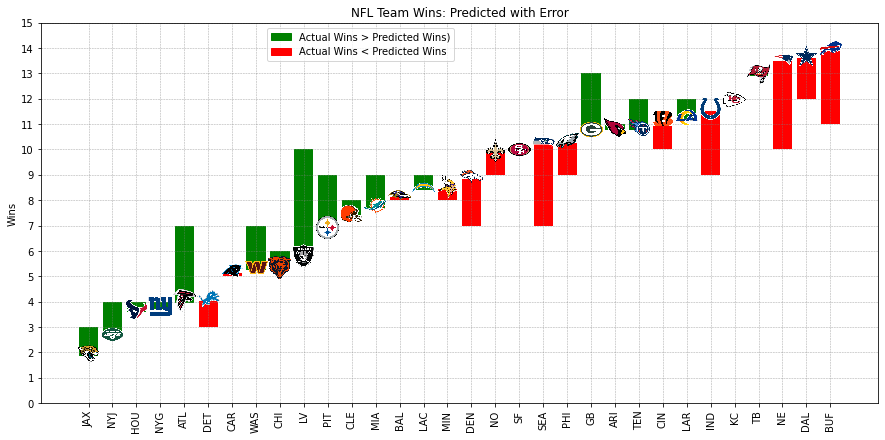

In [16]:
# Plotting
fig, ax = plt.subplots(figsize=(15, 7))  # 10 inches wide by 5 inches tall

# Create each bar with the base color (blue)
bars = ax.bar(teams_sorted, predicted_wins_sorted, color='white', label='Predicted Wins')

# Add the color for the actual wins (green for actual > predicted, red for actual < predicted)
for i in range(len(teams_sorted)):
    if actual_wins_sorted[i] > predicted_wins_sorted[i]:
        # If actual wins are greater, color the top part of the bar green
        ax.bar(teams_sorted[i], actual_wins_sorted[i] - predicted_wins_sorted[i],
               bottom=predicted_wins_sorted[i], color='green', label='Actual Wins (Higher)')
    elif actual_wins_sorted[i] < predicted_wins_sorted[i]:
        # If actual wins are lower, color the top part of the bar red
        ax.bar(teams_sorted[i], predicted_wins_sorted[i] - actual_wins_sorted[i],
               bottom=actual_wins_sorted[i], color='red', label='Actual Wins (Lower)')

# Place images to indicate predicted wins
for bar, img_path, actual, predicted in zip(bars, logos_sorted, actual_wins_sorted, predicted_wins_sorted):
    ab = AnnotationBbox(getImage(img_path, 0.05),
                        (bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.4),
                        frameon=False,
                        box_alignment=(0.5, 0))
    ax.add_artist(ab)

# Add labels and title
ax.set_ylabel('Wins')
ax.set_title('NFL Team Wins: Actual vs Predicted')


# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Wins')
ax.set_title('NFL Team Wins: Predicted with Error')
ax.set_xticks(x)
ax.set_xticklabels(abbr_sorted, rotation=90, ha='center')
ax.set_yticks(range(16))  # range(16) produces integers from 0 to 15 inclusive


# Create legend handles manually
handles = [
    plt.Rectangle((0,0),1,1, color='green', label='Actual Wins > Predicted Wins)'),
    plt.Rectangle((0,0),1,1, color='red', label='Actual Wins < Predicted Wins')
]



# Add the legend
ax.legend(handles=handles, bbox_to_anchor=(0.5, 1))

# Add a grid
ax.grid(True)  # Turn the grid on
ax.grid(which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

# Save the figure
plt.savefig(f'predicted_wins_{year}.png')

# Show the plot
plt.show()


### Plotting Difference Between Predicted and Actual Win Total

In [170]:
# Create an array of win differnces between predicted and actual win totals
differences = -1 * (np.array(predicted_wins_2021) - np.array(actual_wins_2021))

# Combine the data and sort by predicted wins
combined = list(zip(teams, actual_wins_2021, predicted_wins_2021, differences))
combined.sort(key=lambda x: x[3], reverse=False)  # Sort by differences
# print(combined)

# Unzip the sorted data
teams_sorted, actual_wins_sorted, predicted_wins_sorted, errors_sorted = zip(*combined)

x = np.arange(len(teams_sorted))  # the label locations

# Map the sorted list of teams to their abbreviations
abbr_sorted = [team_to_abbreviation[team] for team in teams_sorted if team in team_to_abbreviation]
print(len(abbr_sorted))

# Make another dataframe to manipulate for the graph
temp_logo_df = logo_df

#Map sorted teams
team_to_logos = dict(zip(temp_logo_df['Team'], temp_logo_df['Logo Path']))

# Map the sorted list of teams to their logo paths
logos_sorted = [team_to_logos[team] for team in teams_sorted if team in team_to_logos]

32


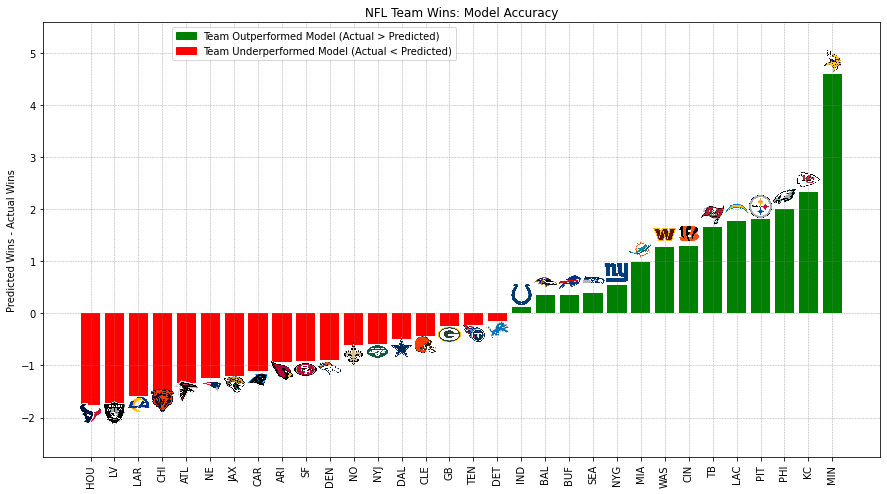

In [171]:
# Plotting
fig, ax = plt.subplots(figsize=(15, 8))  # 10 inches wide by 5 inches tall
bars = ax.bar(abbr_sorted, errors_sorted, color=['green' if x > 0 else 'red' for x in errors_sorted])


# Place images on top of the bars
for bar, img_path in zip(bars, logos_sorted):
    if bar.get_height() > 0:
        ab = AnnotationBbox(getImage(img_path, 0.05),
                        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                        frameon=False,
                        box_alignment=(0.5, 0))
        ax.add_artist(ab)
    else:
        ab = AnnotationBbox(getImage(img_path, 0.05),
                        (bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.4),
                        frameon=False,
                        box_alignment=(0.5, 0))
        ax.add_artist(ab)

# Add labels and title
ax.set_ylabel('Predicted Wins - Actual Wins')
ax.set_title('NFL Team Wins: Model Accuracy')

# Customize x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(abbr_sorted, rotation=90, ha='center')

# Increase the y-axis size to handle the logos at the top/bottom of bars
y_min = min(differences) - 1
y_max = max(differences) + 1
ax.set_ylim(y_min, y_max)

# Create legend handles manually
handles = [
    plt.Rectangle((0, 0), 1, 1, color='green', label='Team Outperformed Model (Actual > Predicted)'),
    plt.Rectangle((0, 0), 1, 1, color='red', label='Team Underperformed Model (Actual < Predicted)')
]

# Add the legend
ax.legend(handles=handles, bbox_to_anchor=(0.5, 1))

# Add a grid
ax.grid(True)  # Turn the grid on
ax.grid(which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

plt.savefig(f'model_error_{year}.png')

# Show the plot
plt.show()
